In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

Text(0, 0.5, 'Target')

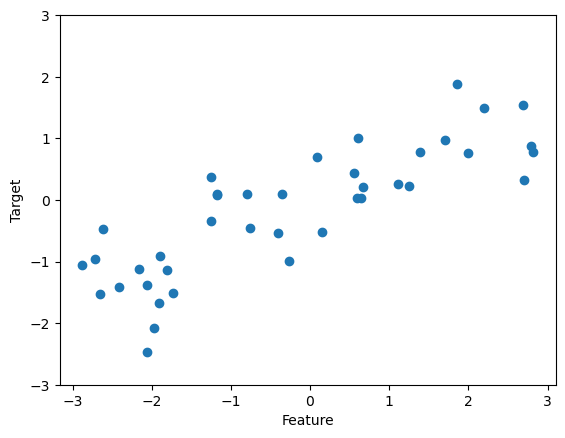

In [2]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

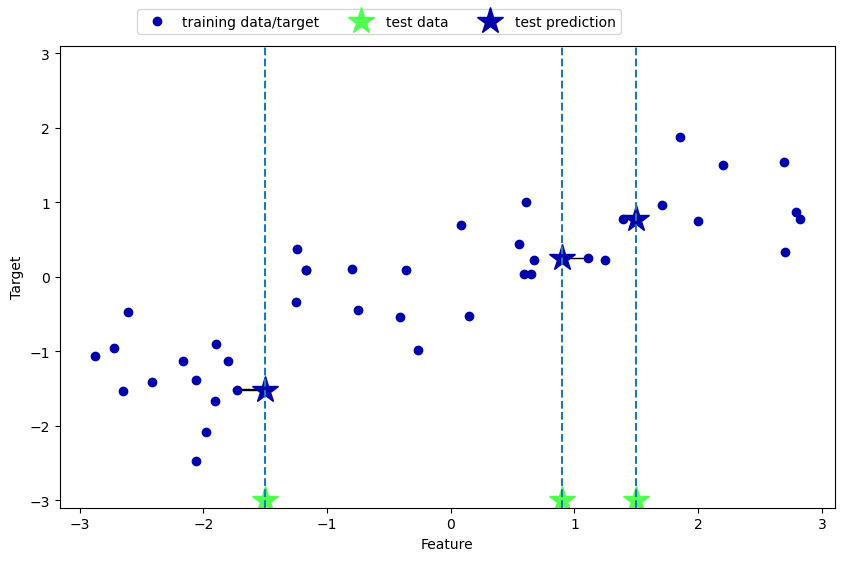

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

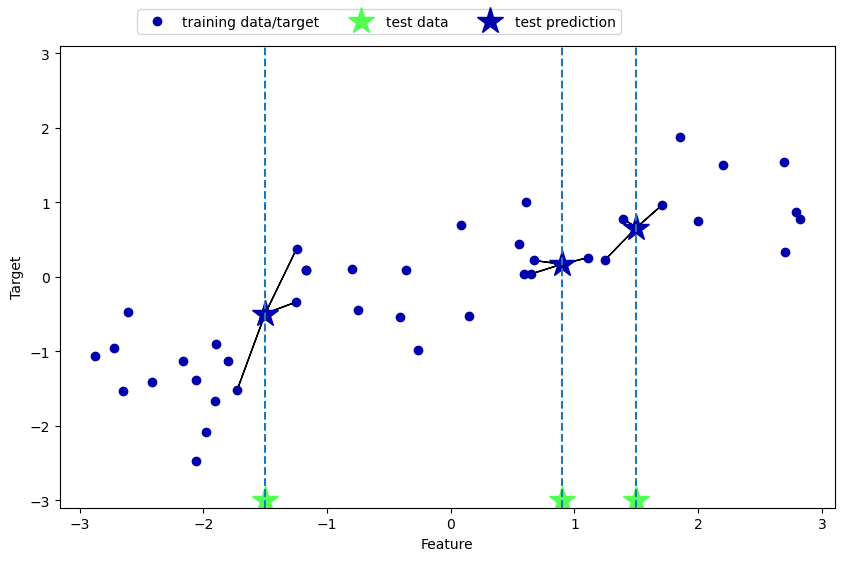

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

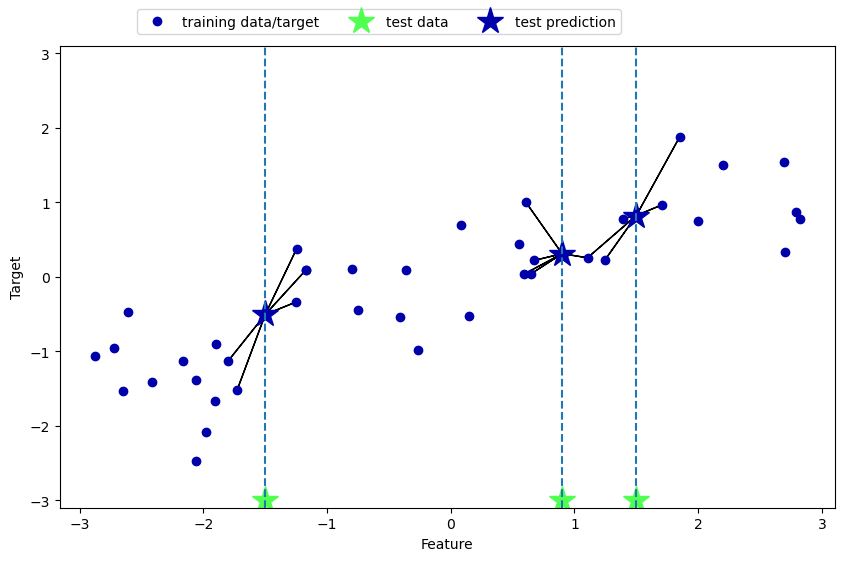

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print("Test set prediction:\n{}".format(reg.predict(X_test)))

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [8]:
# here function "score"  will return the R^2
# R^2 is the determination coefficient in statistics
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


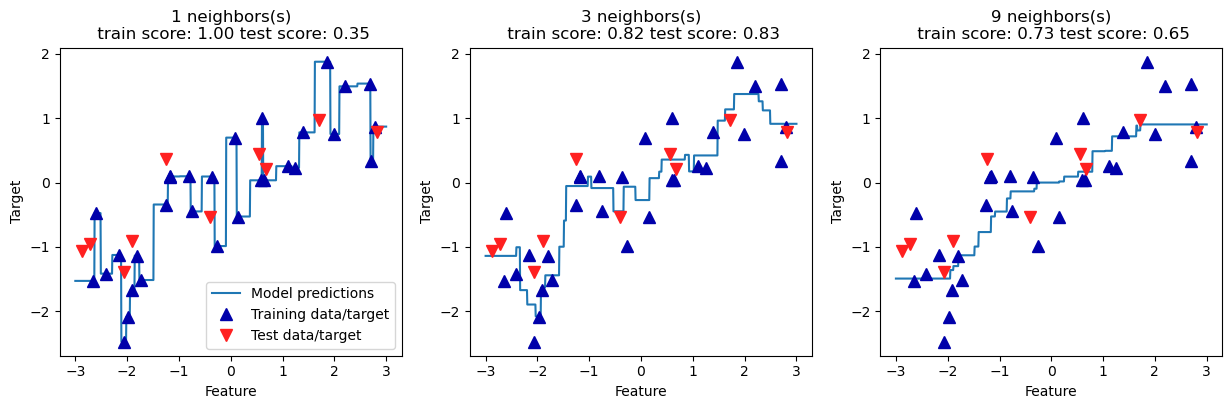

In [14]:
# now we analyse the knn regression model
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# create 1000 data points, arrange between(-3,3)
# linspace here we can create an arithmetic progression
# and we transfer it into an two-dimensional array
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    # train the knn model
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbors(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", 
                "Test data/target"], loc="best")